<a href="https://colab.research.google.com/github/Sarvesh1814/US-Book-Recommendation-System-/blob/main/MF_RR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics Behind Matrix Factorization Model

---
* **Latent factor SVD**
---
\begin{equation}
\hat{r}_{ui} = \mu + b_u + b_i + \sum{f=1}^{k} (q_{if} + p_{uf})
\end{equation}

---
* **Optimization Problem**
---
\begin{equation}
\min_{b_u, b_i, q_i, p_u} \sum_{(u,i) \in R_{train}} (r_{ui} - \hat{r}_{ui})^2 + \lambda (||q_i||^2 + ||p_u||^2 + ||b_u||^2 + ||b_i||^2)
\end{equation}

---
* **Gradient Descent**
---

\begin{equation}
\frac{\partial}{\partial b_u} = -2 (r_{ui} - \hat{r}_{ui}) + 2 \lambda b_u
\end{equation}

\begin{equation}
\frac{\partial}{\partial b_i} = -2 (r_{ui} - \hat{r}_{ui}) + 2 \lambda b_i
\end{equation}

\begin{equation}
\frac{\partial}{\partial p_{uf}} = -2 (r_{ui} - \hat{r}{ui}) q{if} + 2 \lambda p_{uf}
\end{equation}

\begin{equation}
\frac{\partial}{\partial q_{if}} = -2 (r_{ui} - \hat{r}{ui}) p{uf} + 2 \lambda q_{if}
\end{equation}

---
* **Update Rule**
---


\begin{aligned}
b_{u}^{(k+1)} &= b_{u}^{(k)} + \gamma \cdot \left( \sum_{i \in I_u} (r_{ui} - \mu - b_u^{(k)} - b_i^{(k)}) - \lambda b_u^{(k)} \right) \\
b_{i}^{(k+1)} &= b_{i}^{(k)} + \gamma \cdot \left( \sum_{u \in U_i} (r_{ui} - \mu - b_u^{(k)} - b_i^{(k)}) - \lambda b_i^{(k)} \right)
\end{aligned}

\begin{equation}
p_{uk}^{(t+1)} = p_{uk}^{(t)} - \gamma \cdot \frac{\partial}{\partial p_{uk}} J(p_{uk}^{(t)}, q_{ik}^{(t)}, b_u^{(t)}, b_i^{(t)})
\end{equation}

\begin{equation}
q_{ik}^{(t+1)} = q_{ik}^{(t)} - \gamma \cdot \frac{\partial}{\partial q_{ik}} J(p_{uk}^{(t)}, q_{ik}^{(t)}, b_u^{(t)}, b_i^{(t)})
\end{equation}

# Importing Libraries

In [1]:
!pip install surprise
from surprise import Dataset, Reader
import numpy as np
import pandas as pd
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise import dump
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095390 sha256=0c05d6e8cfbbac10bb9f651c22ca1f1903f0ea08dfe8f219f7502e97aad85857
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


# Data 

In [2]:
Base = "/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/"
train=pd.read_csv(Base+"Train_df_final.csv")
test = pd.read_csv(Base+"Test_df_final.csv")

In [3]:
train = train[["User-ID"	,"ISBN",	"Book-Rating"	,"book_name"]]
test = test[["User-ID"	,"ISBN",	"Book-Rating"	,"book_name"]]

In [4]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(train[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset = data.build_full_trainset()


In [5]:
users= pd.read_csv("/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/users_features.csv")

In [6]:
books=pd.read_csv("/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/book_features.csv")
books.head()

,Book-Title,ISBN,page_count,categories,Year-Of-Publication,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100
0,Footfall,0345323440,706.0,330,1996,-0.324090,0.178090,0.085679,0.051699,-0.233513,...,0.382992,-0.090160,-0.040599,-0.159770,0.468369,0.346564,0.053775,-0.575963,0.202055,0.013086
1,Footfall,0345323475,706.0,330,1985,-0.324090,0.178090,0.085679,0.051699,-0.233513,...,0.382992,-0.090160,-0.040599,-0.159770,0.468369,0.346564,0.053775,-0.575963,0.202055,0.013086
2,The Reader,0679442790,224.0,330,1997,-0.265439,0.180581,-0.044998,0.521798,0.064341,...,0.527207,-0.152366,-0.067668,0.264588,0.671669,0.287058,0.089154,-0.696850,-0.135784,0.029446
3,The Reader,0375707972,224.0,330,1999,-0.265439,0.180581,-0.044998,0.521798,0.064341,...,0.527207,-0.152366,-0.067668,0.264588,0.671669,0.287058,0.089154,-0.696850,-0.135784,0.029446
4,The Reader,0679781307,224.0,330,1998,-0.265439,0.180581,-0.044998,0.521798,0.064341,...,0.527207,-0.152366,-0.067668,0.264588,0.671669,0.287058,0.089154,-0.696850,-0.135784,0.029446


# Loading Models

## Recommendation Algorithm

In [7]:
algs, algo = dump.load('/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/Matrix_Factorisation.pkl')


## Reranking Algorithm

In [8]:
with open('/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/XGB_Ranker.pkl', 'rb') as file:
    model = pickle.load(file)



# Recommendation System with Reranking (MF + XGB Ranker) 

In [9]:
def MF_RS():
  k = int(input("Value of K for top-K Recommendations: "))
  user_id = int(input("Enter User-ID: "))  
  uid = trainset.to_inner_uid(user_id)
  all_items = trainset.all_items()
  x = trainset.ur[int(uid)]
  a = [x[i][0] for i in range(len(x))]
  not_rated_items = [item for item in all_items if item not in a]
  predictions = []
  for iid in not_rated_items:
      pred = algo.predict(uid, trainset.to_raw_iid(iid))
      predictions.append((iid, pred.est))
  predictions_sorted = sorted(predictions, key=lambda x: x[1], reverse=True)[:k]
  print("\n")
  print(f"Top {k} Book recommendations for User {user_id} are: ")
  lst =()
  for item, rating in predictions_sorted:
      lst+= ((trainset.to_raw_iid(item),rating),)
  dx = pd.DataFrame(lst,columns=["ISBN","Predicted Rating"])
  uf =users.loc[users['User-ID'] ==user_id ].drop(columns=['User-ID'])
  temp = dx.merge(books,on="ISBN",how="inner").drop(columns=['page_count',"Predicted Rating","Book-Title"])
  temp["Age"] = users["Age"].iloc[0]
  temp["State"] =users["State"].iloc[0]
  X_test = temp.iloc[:,1:]
  y_pred = model.predict(X_test)
  temp['predicted_score'] = y_pred
  temp = temp.sort_values(by='predicted_score', ascending=False)
  temp = temp[["ISBN"]].merge(books[["Book-Title","ISBN"]],on = 'ISBN',how = 'inner')
  
  display(temp.head(k))
  data_dict = temp.iloc[0:5].to_dict(orient='records')
  

In [ ]:
MF_RS()

Value of K for top-K Recommendations: 5
Enter User-ID: 151824


Top 5 Book recommendations for User 151824 are: 


,ISBN,Book-Title
0,0439139597,Harry Potter and the Goblet of Fire (Book 4)
1,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...
2,0446310786,To Kill a Mockingbird
3,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3)
4,043935806X,Harry Potter and the Order of the Phoenix (Boo...


In [ ]:
MF_RS()

Value of K for top-K Recommendations: 5
Enter User-ID: 2033


Top 5 Book recommendations for User 2033 are: 


,ISBN,Book-Title
0,0439139597,Harry Potter and the Goblet of Fire (Book 4)
1,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...
2,0446310786,To Kill a Mockingbird
3,0439064872,Harry Potter and the Chamber of Secrets (Book 2)
4,0385504209,The Da Vinci Code


In [ ]:
MF_RS()

Value of K for top-K Recommendations: 5
Enter User-ID: 254


Top 5 Book recommendations for User 254 are: 


,ISBN,Book-Title
0,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...
1,0446310786,To Kill a Mockingbird
2,0439064872,Harry Potter and the Chamber of Secrets (Book 2)
3,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3)
4,043935806X,Harry Potter and the Order of the Phoenix (Boo...


# Deployed On Postman 

## Without Reranking 

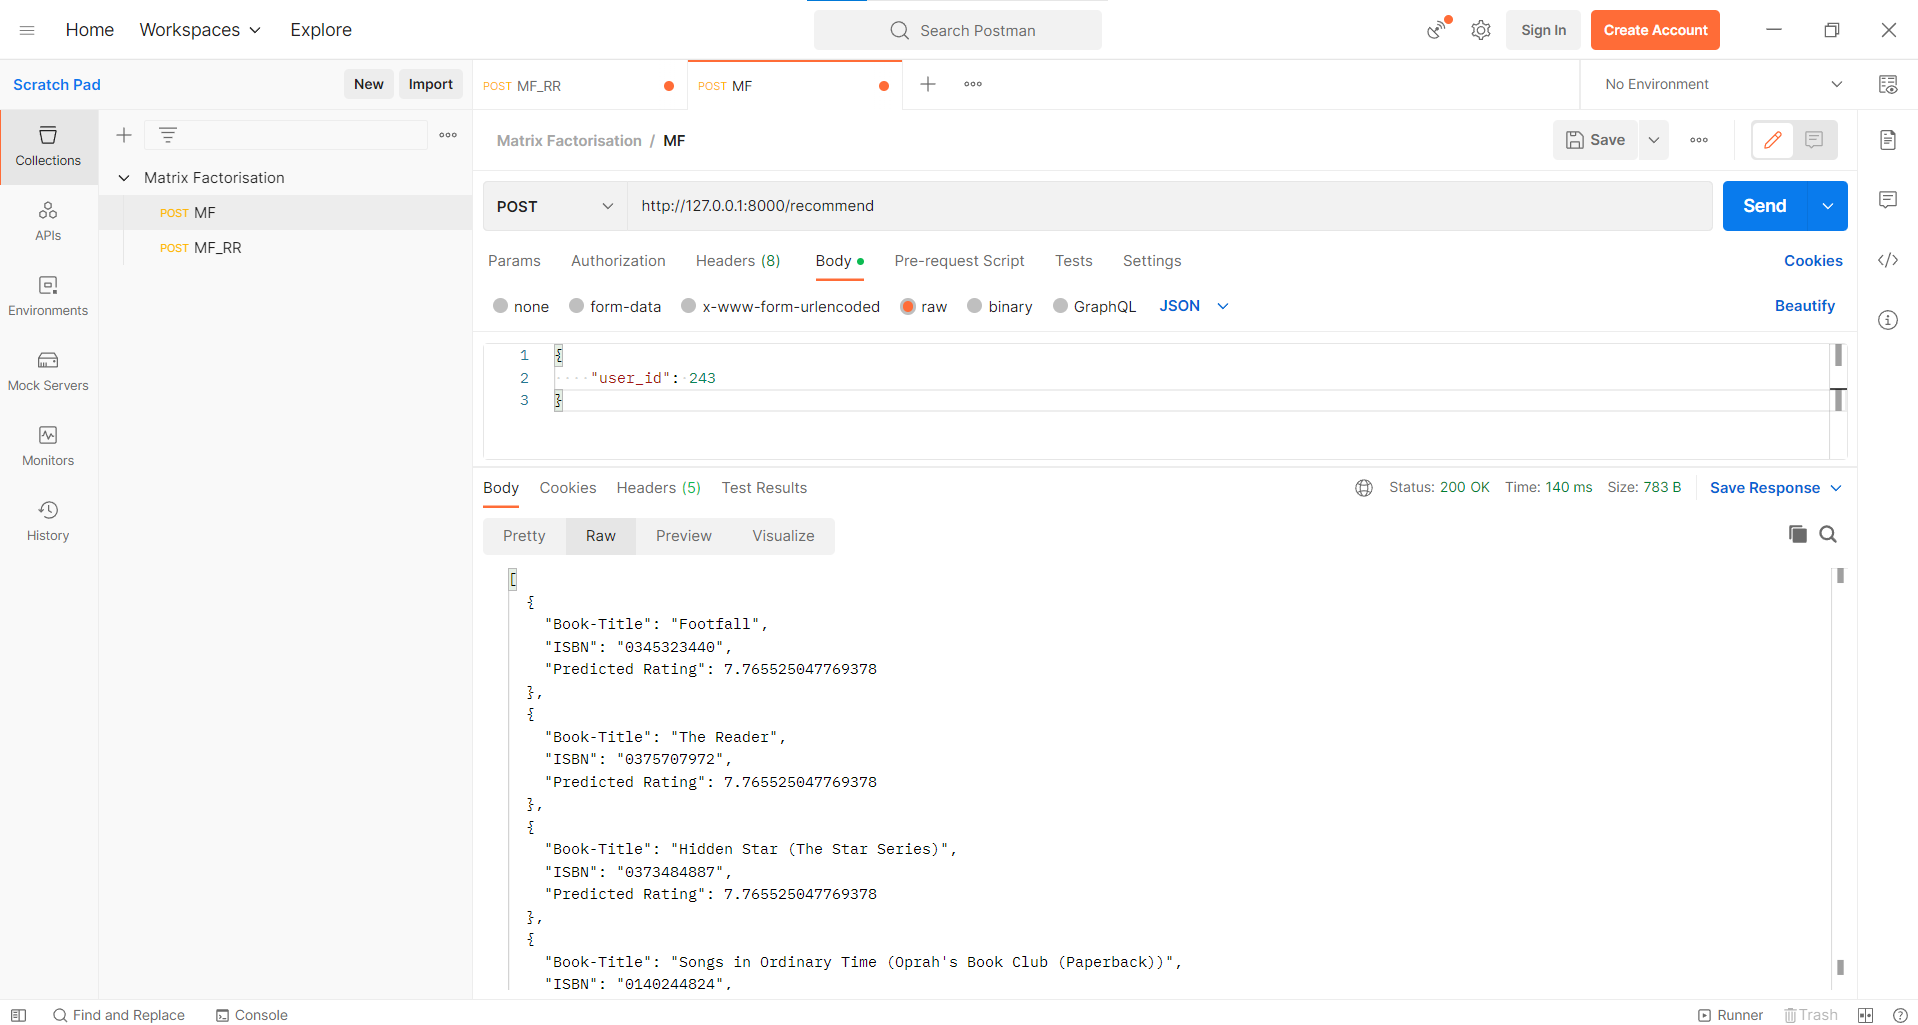

## With Reranking

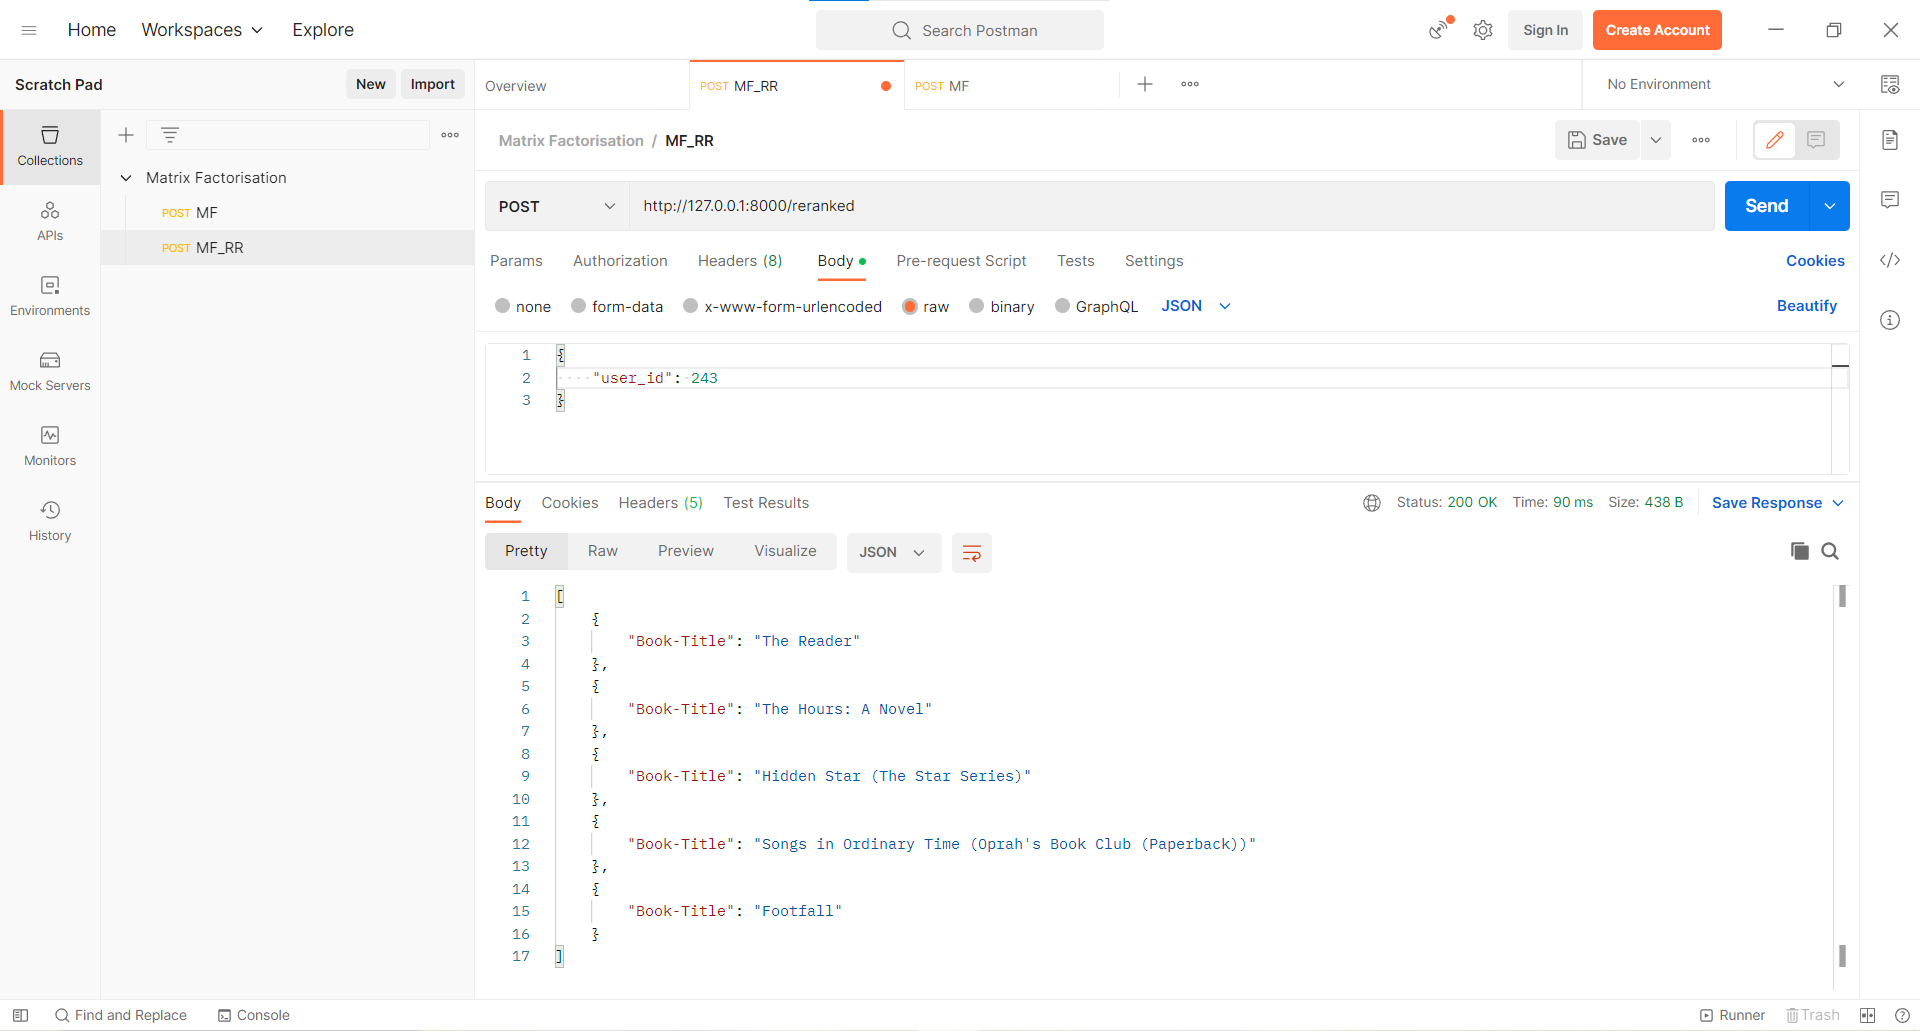

**From the image it can be seen Footfall was at 5th position which is now at 1st position**

## Time Comparision

|Method| Response Time (Average)|
|--|--|
|Without Reranking|69ms|
|With Reranking|111ms|

# Coverage

In [18]:
def MF_RT(user_id,trainset, algo, model, books, users,k):
   
    uid = trainset.to_inner_uid(user_id)
    all_items = trainset.all_items()
    x = trainset.ur[int(uid)]
    a = [x[i][0] for i in range(len(x))]
    not_rated_items = [item for item in all_items if item not in a]
    predictions = []
    for iid in not_rated_items:
        pred = algo.predict(uid, trainset.to_raw_iid(iid))
        predictions.append((iid, pred.est))
    predictions_sorted = sorted(predictions, key=lambda x: x[1], reverse=True)[:k]
    
    lst =()
    for item, rating in predictions_sorted:
        lst+= ((trainset.to_raw_iid(item),rating),)
    dx = pd.DataFrame(lst,columns=["ISBN","Predicted Rating"])
    uf =users.loc[users['User-ID'] ==user_id ].drop(columns=['User-ID'])
    temp = dx.merge(books,on="ISBN",how="inner").drop(columns=['page_count',"Predicted Rating","Book-Title"])
    temp["Age"] = users["Age"].iloc[0]
    temp["State"] =users["State"].iloc[0]
    X_test = temp.iloc[:,1:]
    y_pred = model.predict(X_test)
    temp['predicted_score'] = y_pred
    temp = temp.sort_values(by='predicted_score', ascending=False)
    temp = temp[["ISBN"]].merge(books[["Book-Title","ISBN"]],on = 'ISBN',how = 'inner')
    data_dict = temp.iloc[0:k].to_dict(orient='records')
    return [x['ISBN'] for x in data_dict]


In [12]:
true = test[test['Book-Rating'] == 10]
true = true[true['User-ID'].isin(list(train["User-ID"]))]
true   

,User-ID,ISBN,Book-Rating,book_name
9,31315,051513452X,10,The Lunatic Cafe (Anita Blake Vampire Hunter (...
15,16634,0452261341,10,"Gunslinger Tower 1 (Dark Tower, No 1)"
18,46003,1583224890,10,9-11
29,83287,0553563521,10,Devil's Waltz (Alex Delaware Novels (Paperback))
30,51883,0425077047,10,And Ladies of the Club
...,...,...,...,...
23403,116122,0345434684,10,The Skies Of Pern
23409,198781,0060961325,10,The Celluloid Closet: Homosexuality in the Movies
23410,219259,0767915054,10,A Girl Named Zippy: Growing Up Small in Moorel...
23416,145449,0316107255,10,Penguin Dreams and Stranger Things (A Bloom Co...


### Coverage @5 

In [19]:
all_recommendations = []
for user_id in true["User-ID"]:
    recommendations = MF_RT(user_id, trainset, algo, model, books, users,5)
    all_recommendations.extend(recommendations)
intersection = list(set(all_recommendations).intersection(set(books["ISBN"])))
coverage = len(intersection)/len(set(books["ISBN"]))
coverage

0.0543291059965555

### Coverage @10 

In [23]:
all_recommendations = []
for user_id in true["User-ID"]:
    recommendations = MF_RT(user_id, trainset, algo, model, books, users,10)
    all_recommendations.extend(recommendations)
intersection = list(set(all_recommendations).intersection(set(books["ISBN"])))
coverage = len(intersection)/len(set(books["ISBN"]))
coverage

0.10560513543134492

### Coverage @100

In [24]:
all_recommendations = []
for user_id in true["User-ID"]:
    recommendations = MF_RT(user_id, trainset, algo, model, books, users,100)
    all_recommendations.extend(recommendations)
intersection = list(set(all_recommendations).intersection(set(books["ISBN"])))
coverage = len(intersection)/len(set(books["ISBN"]))
coverage

0.4984343197119148

### Coverage @1000 

In [25]:
all_recommendations = []
for user_id in true["User-ID"]:
    recommendations = MF_RT(user_id, trainset, algo, model, books, users,1000)
    all_recommendations.extend(recommendations)
intersection = list(set(all_recommendations).intersection(set(books["ISBN"])))
coverage = len(intersection)/len(set(books["ISBN"]))
coverage

0.5599655550336621